In [1]:
import os
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
afdb_feature_filenames = os.listdir("./../extract_features/AFDB/")
ltafdb_feature_filenames = os.listdir("./../extract_features/LTAFDB/")

base_pos = np.empty((0, 57))

for feature in afdb_feature_filenames:
    sample = np.load(f"./../extract_features/AFDB/{feature}", allow_pickle=True)
    base_pos = np.vstack((base_pos, sample))

for feature in ltafdb_feature_filenames:
    sample = np.load(f"./../extract_features/LTAFDB/{feature}", allow_pickle=True)
    base_pos = np.vstack((base_pos, sample))

In [3]:
base_pos.shape

(499, 57)

In [4]:
nsrdb_feature_filenames = os.listdir("./../extract_features/NSRDB/")

base_neg = np.empty((0, 57))

for feature in nsrdb_feature_filenames:
    sample = np.load(f"./../extract_features/NSRDB/{feature}", allow_pickle=True)
    base_neg = np.vstack((base_neg, sample))

In [5]:
base_neg.shape

(600, 57)

Histograma

In [6]:
positives = base_pos[np.random.choice(base_pos.shape[0], base_pos.shape[0])]
negatives = base_neg[np.random.choice(base_neg.shape[0], base_neg.shape[0])]

base_ready = np.vstack((positives, negatives))
base_ready = base_ready[0:, 0:-7]

Histograma + BTD

In [13]:
positives = base_pos[np.random.choice(base_pos.shape[0], base_pos.shape[0])]
negatives = base_neg[np.random.choice(base_neg.shape[0], base_neg.shape[0])]

base_ready = np.vstack((positives, negatives))
part_a = base_ready[0:, 0:-7]
part_b = base_ready[0:, -6:]
base_ready = np.hstack((part_a, part_b))

BTD

In [7]:
positives = base_pos[np.random.choice(base_pos.shape[0], base_pos.shape[0])]
negatives = base_neg[np.random.choice(base_neg.shape[0], base_neg.shape[0])]

base_ready = np.vstack((positives, negatives))
base_ready = base_ready[0:, -6:]

In [8]:
y = np.hstack((np.ones(base_pos.shape[0]), np.zeros(base_neg.shape[0])))
X = base_ready

In [9]:
X.shape

(1099, 6)

In [10]:
y.shape

(1099,)

# SVM

In [ ]:
svm_classifier = SVC(kernel="linear", C=1)
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(svm_classifier, X, y, cv=kf)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_deviation = np.std(scores)
print(f"Mean accuracy: {mean_score:.2f} (+/- {std_deviation:.2f})")

# PCA + SVM

In [13]:
pca = PCA(n_components=4)

svm_classifier = SVC(kernel="linear", C=1)
xgb_classifier = XGBClassifier()
pipeline = Pipeline([("pca", pca), ("svm", xgb_classifier)])

kf = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(pipeline, X, y, cv=kf)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_deviation = np.std(scores)
print(f"Mean accuracy: {mean_score:.2f} (+/- {std_deviation:.2f})")

Cross-validation scores: [0.96363636 0.91818182 0.94545455 0.9        0.97272727 0.93636364
 0.95454545 0.95454545 0.97272727 0.94495413]
Mean accuracy: 0.95 (+/- 0.02)


# XGBOOST

In [ ]:
xgb_classifier = XGBClassifier()
kf = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(xgb_classifier, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_deviation = np.std(scores)
print(f"Mean accuracy: {mean_score:.2f} (+/- {std_deviation:.2f})")

# MLP qualis

In [14]:
model1 = MLPClassifier(
    activation="tanh",
    alpha=2.6e-06,
    beta_1=0.999,
    beta_2=0.9,
    hidden_layer_sizes=(50, 50),
    max_iter=64,
    n_iter_no_change=32,
    validation_fraction=0.0,
    warm_start=True,
)


kf = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(pipeline, X, y, cv=kf)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_deviation = np.std(scores)
print(f"Mean accuracy: {mean_score:.2f} (+/- {std_deviation:.2f})")

Cross-validation scores: [0.95454545 0.96363636 0.92727273 0.96363636 0.95454545 0.96363636
 0.93636364 0.91818182 0.90909091 0.93577982]
Mean accuracy: 0.94 (+/- 0.02)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize variables for results
sample_counts = []  # Stores the number of training samples
accuracies = []
labels = []  # Stores labels for x-axis


# XGB
model1 = XGBClassifier()

# PCA + SVM
pca = PCA(n_components=4)
svm_classifier = SVC(kernel="linear", C=1)
xgb_classifier = XGBClassifier()
model2 = Pipeline([("pca", pca), ("svm", xgb_classifier)])


choosed_model = model1

# Define a range of percentages for decreasing data
data_percentages = np.arange(25, 0, -1) / 100

# Iterate over the data percentages
for data_percentage in data_percentages:
    data_percentage = round(data_percentage, 4)

    # Split the data into training and test sets with the specified percentage
    
    num_samples = int(len(X) * data_percentage)
    
    print(data_percentage, num_samples)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - data_percentage, random_state=42)
    
    # Create and train your model (replace with your model and hyperparameters)
    choosed_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = choosed_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results to the lists
    sample_counts.append(num_samples)
    accuracies.append(accuracy)
    
    labels.append(f"{num_samples}\n{data_percentage * 100:.0f}%")


0.25 274
0.24 263
0.23 252
0.22 241
0.21 230
0.2 219
0.19 208
0.18 197
0.17 186
0.16 175
0.15 164
0.14 153
0.13 142
0.12 131
0.11 120
0.1 109
0.09 98
0.08 87
0.07 76
0.06 65
0.05 54
0.04 43
0.03 32
0.02 21
0.01 10


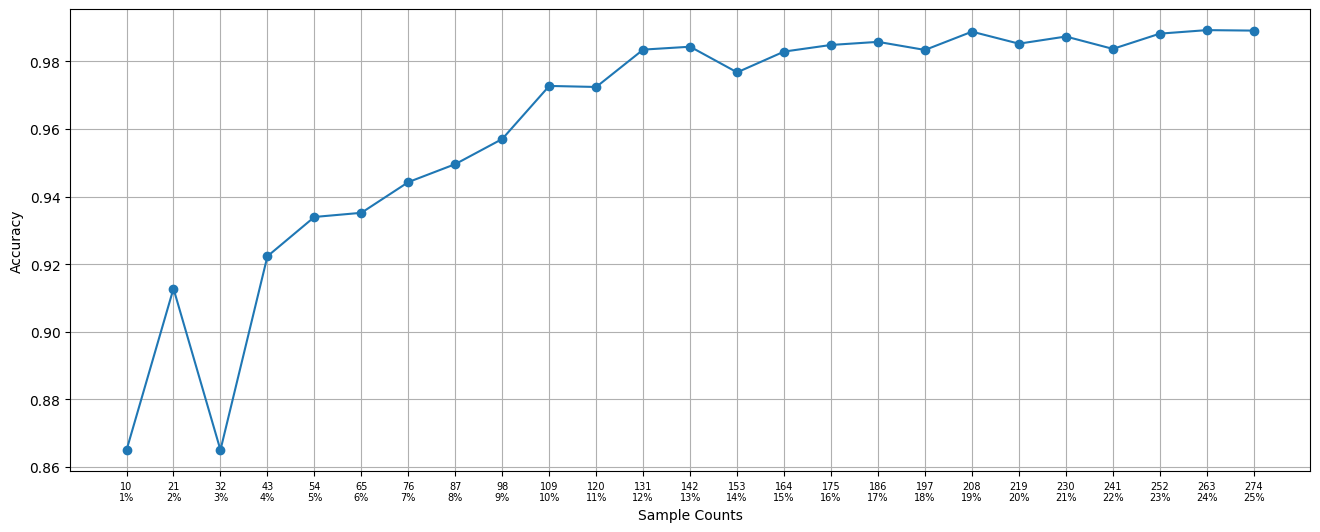

In [18]:


# Create a DataFrame to store the results
results_df = pd.DataFrame({'Sample Counts': sample_counts, 'Accuracy': accuracies})

# Plot the results
plt.figure(figsize=(16, 6))
plt.plot(results_df['Sample Counts'], results_df['Accuracy'], marker='o')

plt.xlabel('Sample Counts')
plt.xticks(sample_counts, labels, fontsize=7)  # Set x-axis labels every fifth sample
plt.ylabel('Accuracy')
plt.grid(True)

# Show the plot
plt.show()